# Stock Market Analysis Visualization

For this project I will be visualizing stock data of a few car companies, from Jan 1, 2012 to Jan 1, 2017.

### Import Libraries

In [43]:
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## Getting the Data

In [46]:
tesla= pd.read_csv("Tesla_Stock.csv", index_col = 'Date', parse_dates=True)

In [48]:
tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [49]:
ford= pd.read_csv("Ford_Stock.csv", index_col = 'Date', parse_dates=True)

In [50]:
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [51]:
gm= pd.read_csv("GM_Stock.csv", index_col = 'Date', parse_dates=True)

In [52]:
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


## Visualizing the Data

** First, lets examine a linear plot of all the stocks' Open price.**

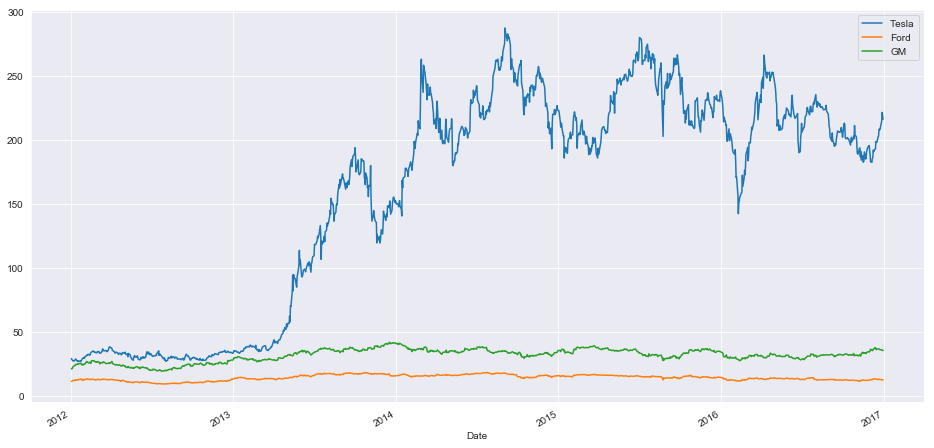

In [53]:
tesla['Open'].plot.line(figsize = (16,8))
ford['Open'].plot.line()
gm['Open'].plot.line()
plt.legend(labels = ('Tesla', 'Ford', 'GM'));

** Now we will plot the Volume of stock traded each day.**

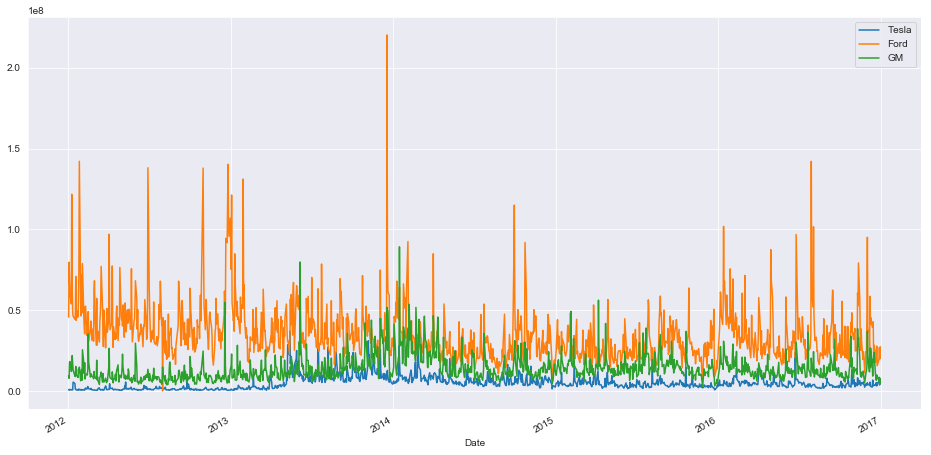

In [58]:
l = ('Tesla', 'Ford', 'GM')
tesla['Volume'].plot.line(figsize =(16,8))
ford['Volume'].plot.line(figsize =(16,8))
gm['Volume'].plot.line(figsize =(16,8))
plt.legend(labels = l);

** Interesting, looks like Ford had a really big spike somewhere in late 2013. Lets investigate. **

In [57]:
print(ford[ford.Volume == ford.Volume.max()].index)

DatetimeIndex(['2013-12-18'], dtype='datetime64[ns]', name='Date', freq=None)


According to Google, Fords stock price fell agressively this day due to the annoucement that new developments would eat into profits.

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. This still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

In [60]:
tesla['Total_Traded'] = tesla["Open"] * tesla['Volume']
ford['Total_Traded'] = ford["Open"] * ford['Volume']
gm['Total_Traded'] = gm["Open"] * gm['Volume']

** Lets examine "Total Traded" against the time index.**

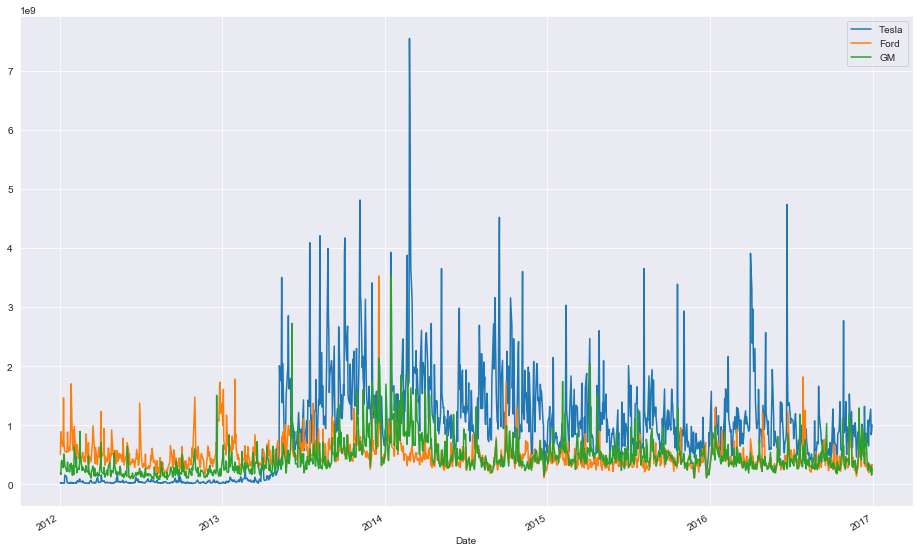

In [61]:
tesla["Total_Traded"].plot.line(figsize = (16,10))
ford["Total_Traded"].plot.line()
gm["Total_Traded"].plot.line()
plt.legend(labels = l);

** Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? **

In [65]:
print(tesla['Total_Traded'].argmax())

2014-02-25 00:00:00


According to Google, the shares rallied tremendously after the announcement of stronger than expected profits.

** Let's take a look at some MA (Moving Averages). First, a 50 day (MA50) and a 200 day (MA200) moving average for GM. **

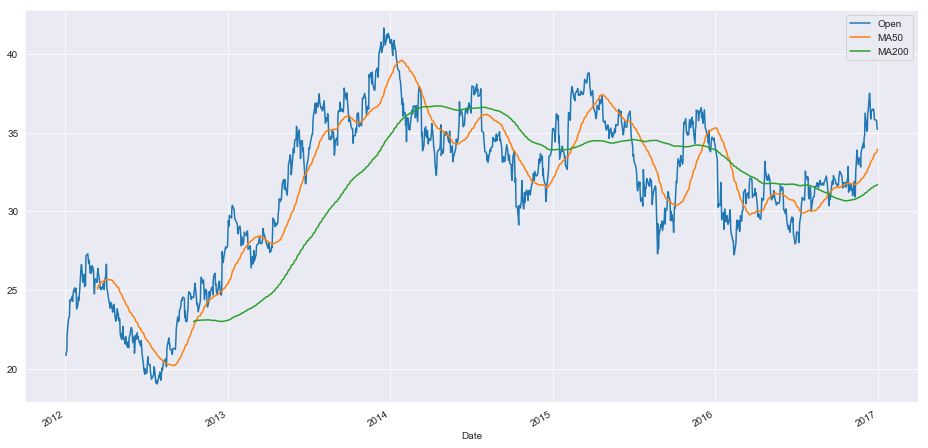

In [66]:
gm['Open'].plot(figsize = (16,8))
gm.rolling(window = 50).mean()['Open'].plot()
gm.rolling(window = 200).mean()['Open'].plot()
plt.legend(labels = ('Open', 'MA50', 'MA200'));

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot.**

In [67]:
from pandas.plotting import scatter_matrix

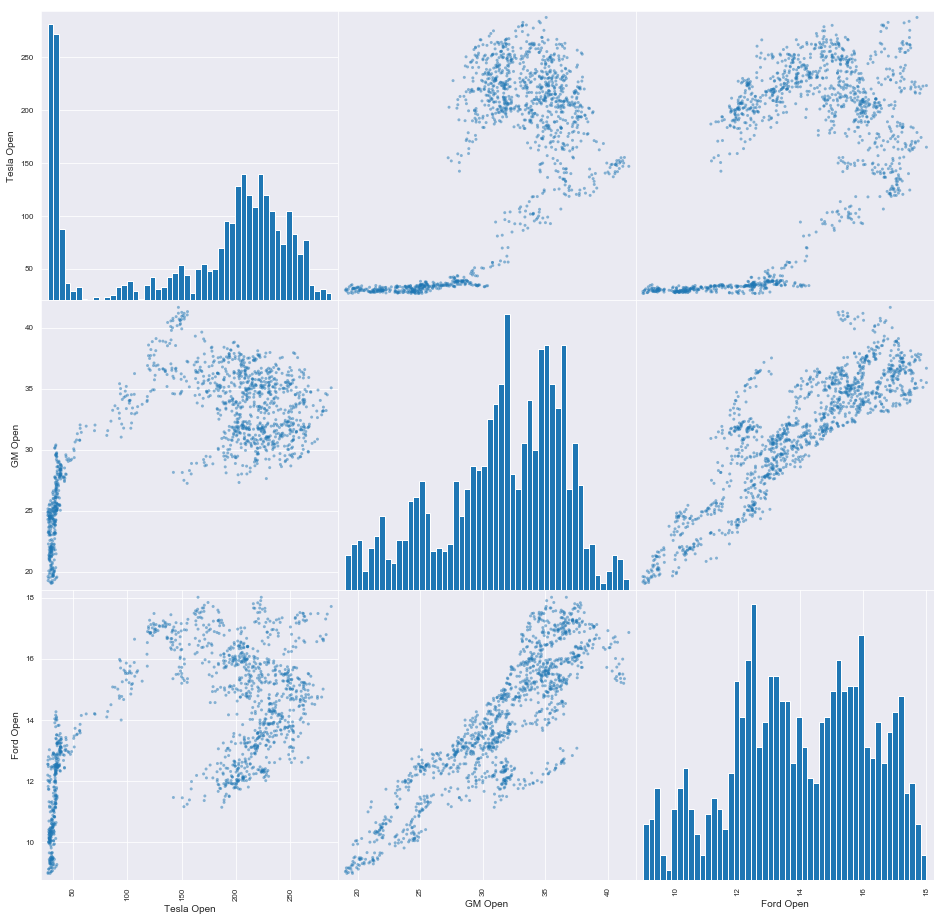

In [69]:
s_m = pd.DataFrame()
s_m["Tesla Open"] = tesla["Open"]
s_m["GM Open"] = gm["Open"]
s_m["Ford Open"] = ford["Open"]
scatter_matrix(s_m, figsize = (16,16), hist_kwds={'bins':50});

# Basic Financial Analysis

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on a day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable.

In [70]:
ford['Returns'] = ford['Close'].pct_change()
tesla['Returns'] = tesla['Close'].pct_change()
gm['Returns'] = gm['Close'].pct_change()

In [71]:
ford.head()

,Open,High,Low,Close,Volume,Total_Traded,Returns
Date,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686


In [72]:
tesla.head()

,Open,High,Low,Close,Volume,Total_Traded,Returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [73]:
gm.head()

,Open,High,Low,Close,Volume,Total_Traded,Returns
Date,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,0.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,0.048227
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,0.033829
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,-0.003490


** Now a histogram of each companies returns.**

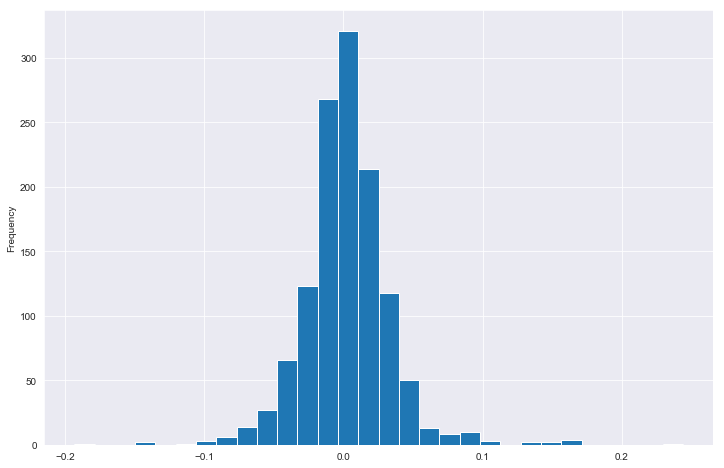

In [74]:
plt.figure(figsize=(12,8))
tesla['Returns'].plot.hist(bins = 30);

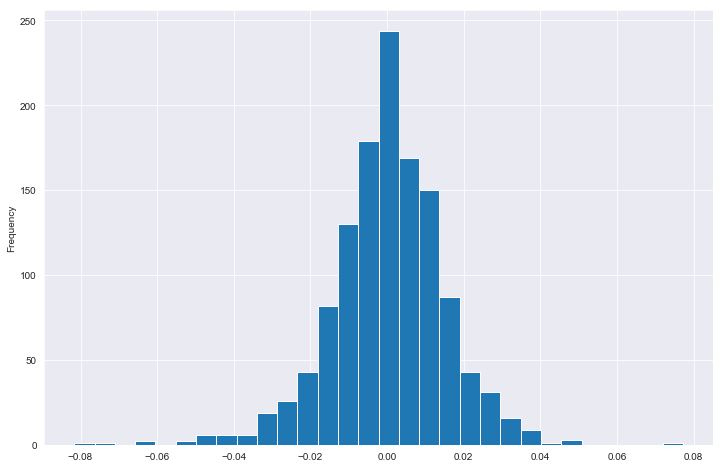

In [75]:
plt.figure(figsize=(12,8))
ford['Returns'].plot.hist(bins = 30);

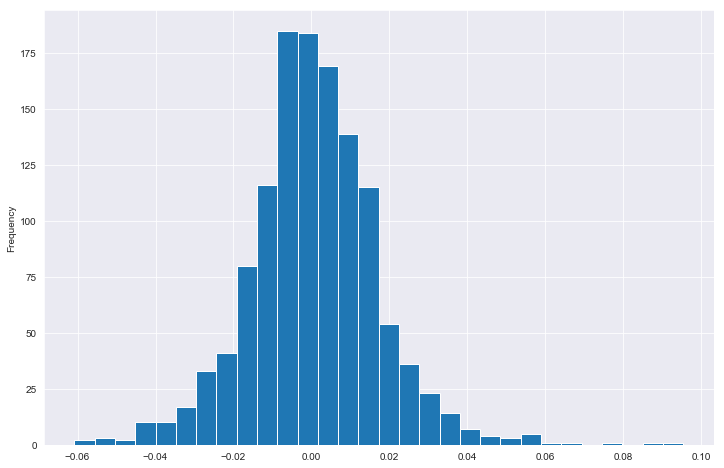

In [76]:
plt.figure(figsize=(12,8))
gm['Returns'].plot.hist(bins = 30);

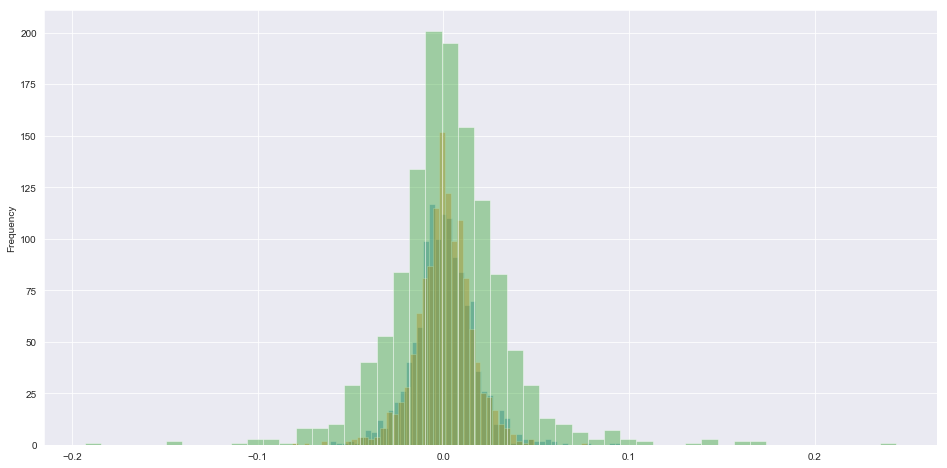

In [77]:
gm['Returns'].plot.hist(bins = 50, alpha = .4) 
ford['Returns'].plot.hist(bins = 50, alpha = .4)
tesla['Returns'].plot.hist(bins = 50, alpha = .4, figsize = (16, 8));

** Lets examine a Kernal Density Estimation ploy instead of histograms for another view point.**

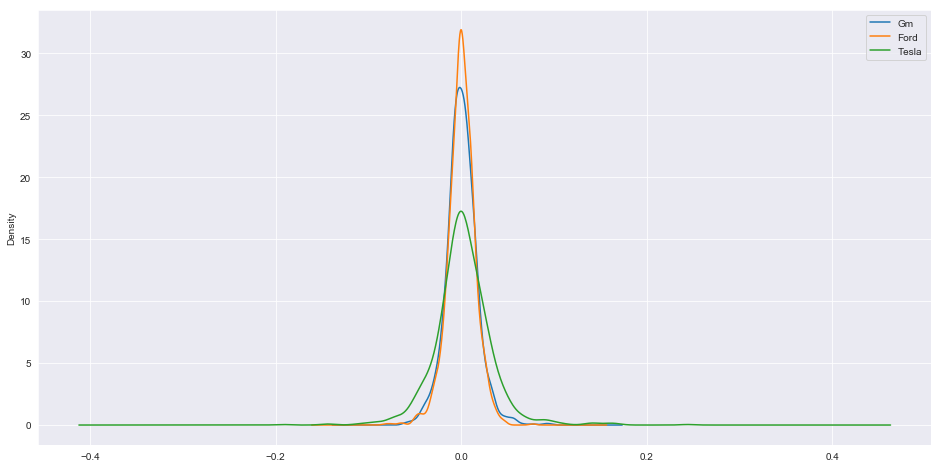

In [78]:
gm['Returns'].plot.kde() 
ford['Returns'].plot.kde()
tesla['Returns'].plot.kde(figsize = (16, 8))
plt.legend(['Gm', 'Ford', 'Tesla']);

** Finally, some box plots comparing the returns. **

In [79]:
all3 = pd.DataFrame()
all3['Tesla'] = tesla['Returns']
all3['Ford'] = ford['Returns']
all3['GM'] = gm['Returns']

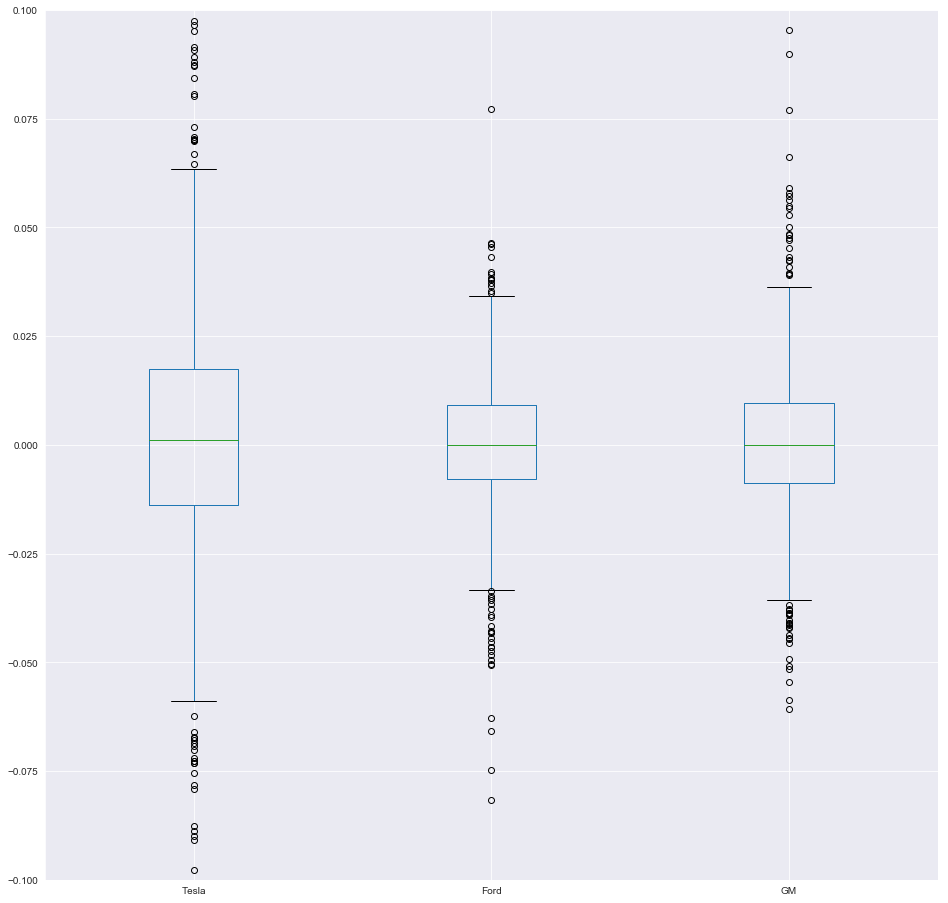

In [80]:
all3.plot.box(figsize = (16,16), ylim = [-0.1, 0.1]);

## Comparing Daily Returns between Stocks

** Lets create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are.**

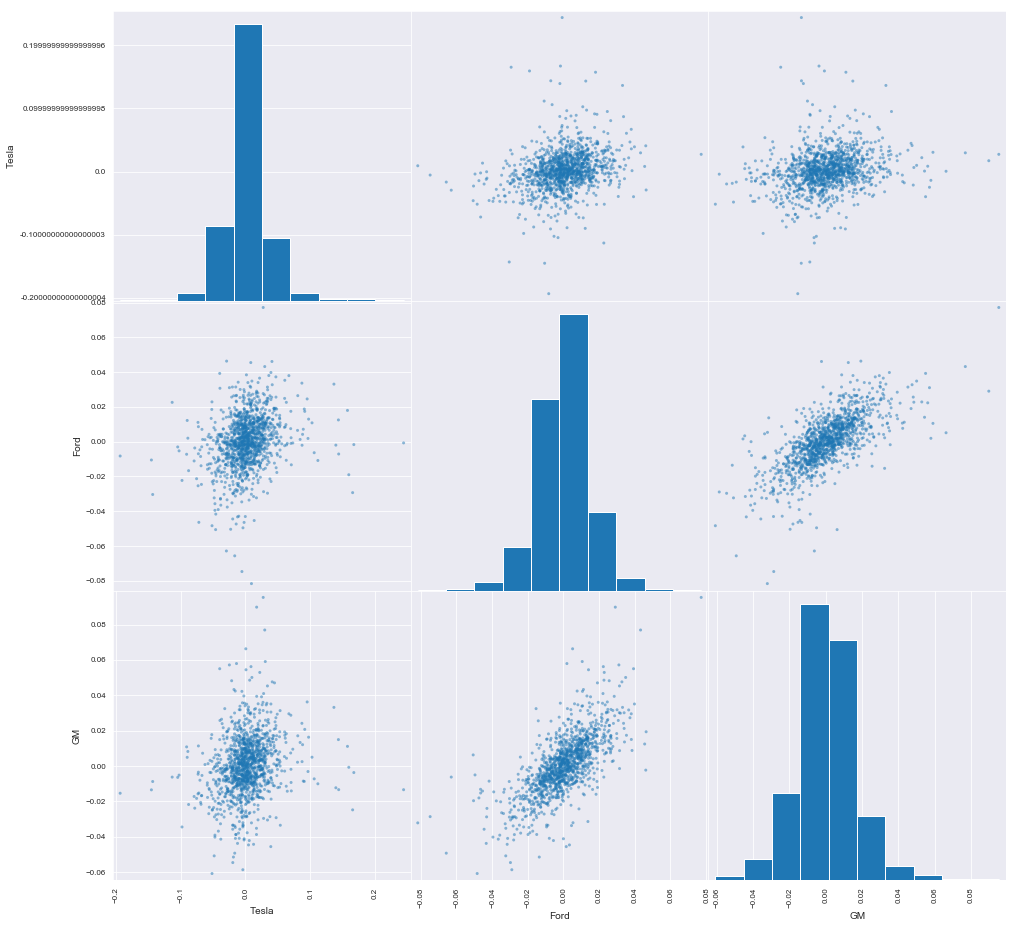

In [81]:
scatter_matrix(all3,figsize =(16,16));

** It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

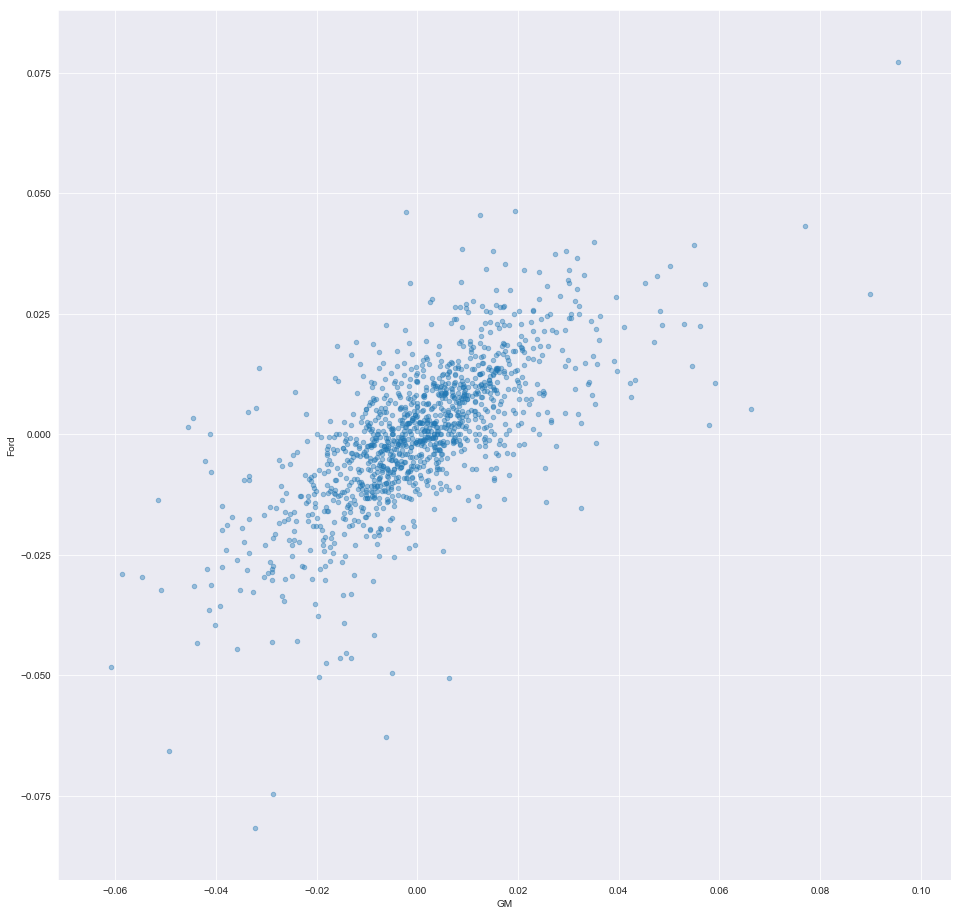

In [82]:
all3.plot.scatter(x = 'GM', y = 'Ford', alpha = .4, figsize = (16,16));

## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns.

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [83]:
ford['Cumulative Return'] = (1 + ford['Returns']).cumprod()
gm['Cumulative Return'] = (1 + gm['Returns']).cumprod()
tesla['Cumulative Return'] = (1 + tesla['Returns']).cumprod()

In [84]:
tesla.head()

,Open,High,Low,Close,Volume,Total_Traded,Returns,Cumulative Return
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


** Now lets the Cumulative Return columns against the time series index.**

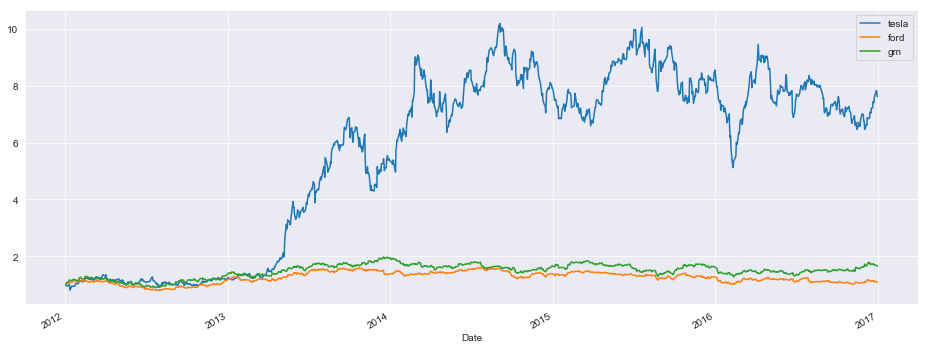

In [85]:
tesla['Cumulative Return'].plot.line(figsize = (16,6))
ford['Cumulative Return'].plot.line()
gm['Cumulative Return'].plot.line()
plt.legend(['tesla', 'ford', 'gm']);